# Check out a 1D Plane Wave

Necessary imports:

In [1]:
import sys 
sys.path.append('..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import get_field_data as gfd

Matplotlib is building the font cache; this may take a moment.


Point to directory, where the data lies.

In [3]:
# Data path
scratch_dir = "/project/th-scratch/a/And.Lindner"

# Data folder
folder = "1d_plane"

# Combine
path = os.path.join(scratch_dir,folder)
path

'/project/th-scratch/a/And.Lindner/1d_plane'

Note on the data:  
Simulated is a plane wave with a wavelength of $10\mu m$, an amplitude of $0.1E_{cr}$, polarized in z-direction, propagating in x-direction.  
The simulation time was $35\mu m/c$, divided into 100 steps, with outputs at steps 50 and 100.

1. Define which field component you want to have.
0 is $E_x$, 1 is $E_y$, 2 is $E_z$, 3 is $B_x$, etc.

2. Define which step you want to get.
The available output steps were defined in your simulation and name the prefix of the output files. 

3. Give the number of processes/patches used in the simulation.

In [8]:
component=2
step=50
n_prc=1

Check the output directory. Is this what you want?

In [5]:
print(path+f"/{step}_{n_prc}.csv")

/project/th-scratch/a/And.Lindner/1d_plane/50_1.csv


Then load it into a variable.

In [9]:
ez50=gfd.get_field1D(path,component,n_prc,step)

And check out another time step the code has written to disk.

In [10]:
step=100

In [11]:
ez100=gfd.get_field1D(path,component,n_prc,step)

And have a look.

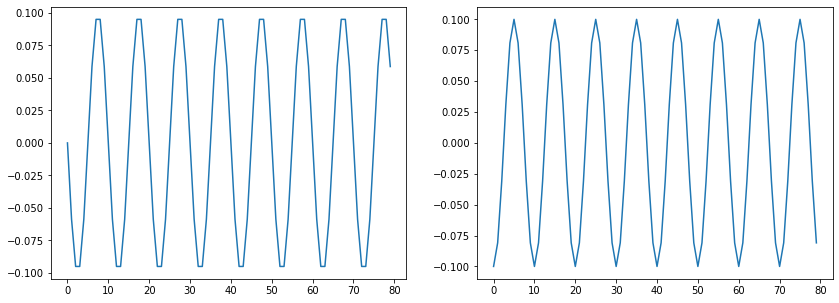

In [18]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(ez50)
plt.subplot(1,2,2)
plt.plot(ez100)
plt.show()

Good, but obviously the grid resolution could be higher in order to model the wave more smoothly.

There is a **wrapper to combine multiple output steps** of one field component into an array.

Give the steps into a list.

In [13]:
steps=[50,100]

Pass them to wrapper as such:

In [14]:
ez=gfd.combine_steps(gfd.get_field1D,path,component,n_prc,steps=steps)

Check out the data.

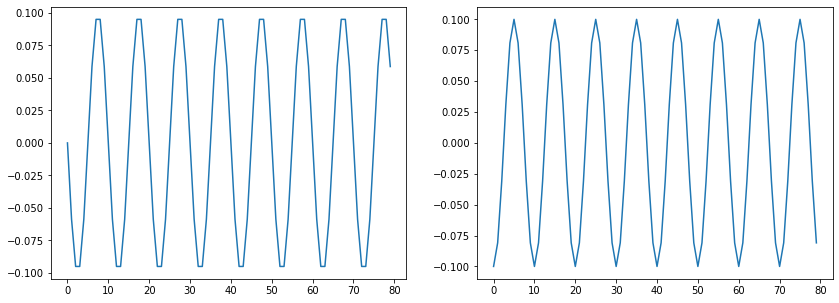

In [19]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(ez[0])
plt.subplot(1,2,2)
plt.plot(ez[1])
plt.show()